# Setup Code

In [1]:
import time
from timeit import default_timer as timer
import numpy as np
from functools import wraps
import cProfile
import subprocess
NAME = ""

# Task 1.1
Clock granularity is the smallest measurable time difference that the system’s timer can distinguish. It depends on the underlying hardware and the precision of the software timer being used. Granularity impacts the accuracy of performance measurements and time-sensitive operations in applications.

## Comparison of timers: 
time.time() and time.time_ns() have comparable granularities, suggesting they rely on the same underlying system clock. timeit, designed for high-precision benchmarking, shows a finer granularity, indicating that it may use a more precise timer. We conclude that if we use time.time() or time.time_ns() for profiling, these operation will not have the same precision as timeit. Only for general-purpose timekeeping or measuring events that span milliseconds or more, time.time() or time.time_ns() are adequate. 

## Code

In [2]:
def checktick_0():
    """
    time.time(): precision is approximately ± 1 microsecond
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time() # get timestamp from timer
        t2 = time.time() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

def checktick_1():
    """
    timeit: higher resolution, lower clock granularity
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  timer() # get timestamp from timer
        t2 = timer() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = timer() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

def checktick_2():
    """
    higher resolution in nanoseconds
    """
    M = 200
    timesfound = np.empty((M,))
    for i in range(M):
        t1 =  time.time_ns() # get timestamp from timer
        t2 = time.time_ns() # get timestamp from timer
        while (t2 - t1) < 1e-16: # if zero then we are below clock granularity, retake timing
            t2 = time.time_ns() # get timestamp from timer
        t1 = t2 # this is outside the loop
        timesfound[i] = t1 # record the time stamp
    minDelta = 1000000
    Delta = np.diff(timesfound) # it should be cast to int only when needed
    minDelta = Delta.min()
    return minDelta

In [3]:

print("----------Exercise 1: Profiling the Julia Set Code----------\n")
print("-------------------------Task 1.1-------------------------")
print("time.time() : ", checktick_0())
print("timeit : ", checktick_1())
print("time.time_ns() : ", checktick_2()/1000000000, "\n")

----------Exercise 1: Profiling the Julia Set Code----------

-------------------------Task 1.1-------------------------
time.time() :  4.76837158203125e-07
timeit :  4.90999809699133e-07
time.time_ns() :  5.12e-07 



## Code Output:
time.time() :  4.76837158203125e-07

timeit :  4.90999809699133e-07

time.time_ns() :  5.12e-07 

# Task 1.2 
As you can see below, both standard deviation values are rather low, indicating that the execution times are consistent across runs.
The smallest measurable time difference for our system was very small, approximately 8.8 milliseconds. The standard deviations are orders of magnitude larger than the clock granularity. This means that the variations in execution time are due to external system factors (e.g., CPU scheduling, background processes), not limitations of the timer resolution.

## Code: Wrapper Function

In [4]:
def timefn_1_2(fn):
  @wraps(fn)
  def measure_time(*args, **kwargs):
    times = np.zeros(3, dtype=float)
    for i in range(3):
      t1 = timer()
      result = fn(*args, **kwargs)
      t2 = timer()
      times[i] = t2-t1
    print(f"@timefn_1_2: {fn.__name__} took {np.average(times)} seconds on average, with standard deviation {np.std(times)}")
    return result
  return measure_time

In [5]:
from main import calc_pure_python, calculate_z_serial_purepython

print("-------------------------Task 1.2-------------------------")
print("Profiling calc_pure_python:")
test1 = timefn_1_2(calc_pure_python)
params2 = test1(desired_width=1000, max_iterations=300)
print("\n Profiling calculate_z_serial_purepython")
test2 = timefn_1_2(calculate_z_serial_purepython)
test2(300, params2[0], params2[1])
print("\n")
params_zfunc = params2


-------------------------Task 1.2-------------------------
Profiling calc_pure_python:
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 9.544822692871094 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 6.708987474441528 seconds
Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 6.717830419540405 seconds
@timefn_1_2: calc_pure_python took 8.100036254332736 seconds on average, with standard deviation 1.4250033284122825

 Profiling calculate_z_serial_purepython
@timefn_1_2: calculate_z_serial_purepython took 6.7335094726665075 seconds on average, with standard deviation 0.014605186538963576




# Task 1.3 

All of our calculations for cProfile, SnakeViz, and line_profiler are below. 

We see that calculate_z_serial_purepython took about 59.8 seconds whereas cProfile took about 13.76 seconds. calculate_z_serial_purepython took around 5x longer than cProfile. 

The overhead added by using cProfile and line_profiler: 

Overhead using cProfile: 4.705276966094971 s - 3.439000129699707 s = 1.2662768364 s
Overhead using line_profiler: 27.055697202682495 s - 3.439000129699707 s = 23.616697073 s

## Results of cProfile:

In [6]:
! python -m cProfile -s cumulative JuliaSet.py

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 13.784669637680054 seconds
new sum:  33219980
         36221997 function calls in 15.178 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   15.178   15.178 {built-in method builtins.exec}
        1    0.043    0.043   15.178   15.178 JuliaSet.py:1(<module>)
        1    0.976    0.976   15.135   15.135 JuliaSet.py:20(calc_pure_python)
        1    9.041    9.041   13.785   13.785 JuliaSet.py:60(calculate_z_serial_purepython)
 34219980    4.743    0.000    4.743    0.000 {built-in method builtins.abs}
  2002000    0.361    0.000    0.361    0.000 {method 'append' of 'list' objects}
        2    0.013    0.006    0.013    0.006 {built-in method builtins.sum}
        4    0.000    0.000    0.000    0.000 {built-in method builtins.print}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' o

In [7]:
! python -m cProfile -o profile.stats JuliaSet.py

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 13.760093212127686 seconds
new sum:  33219980


## Results of snakeviz

In [8]:
! python -m snakeviz profile.stats --server

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Fhome%2Fchris%2FDocuments%2FKTH_P3%2FHPC%2FModule_1%2FSubmission%2Fprofile.stats
^C

Bye!


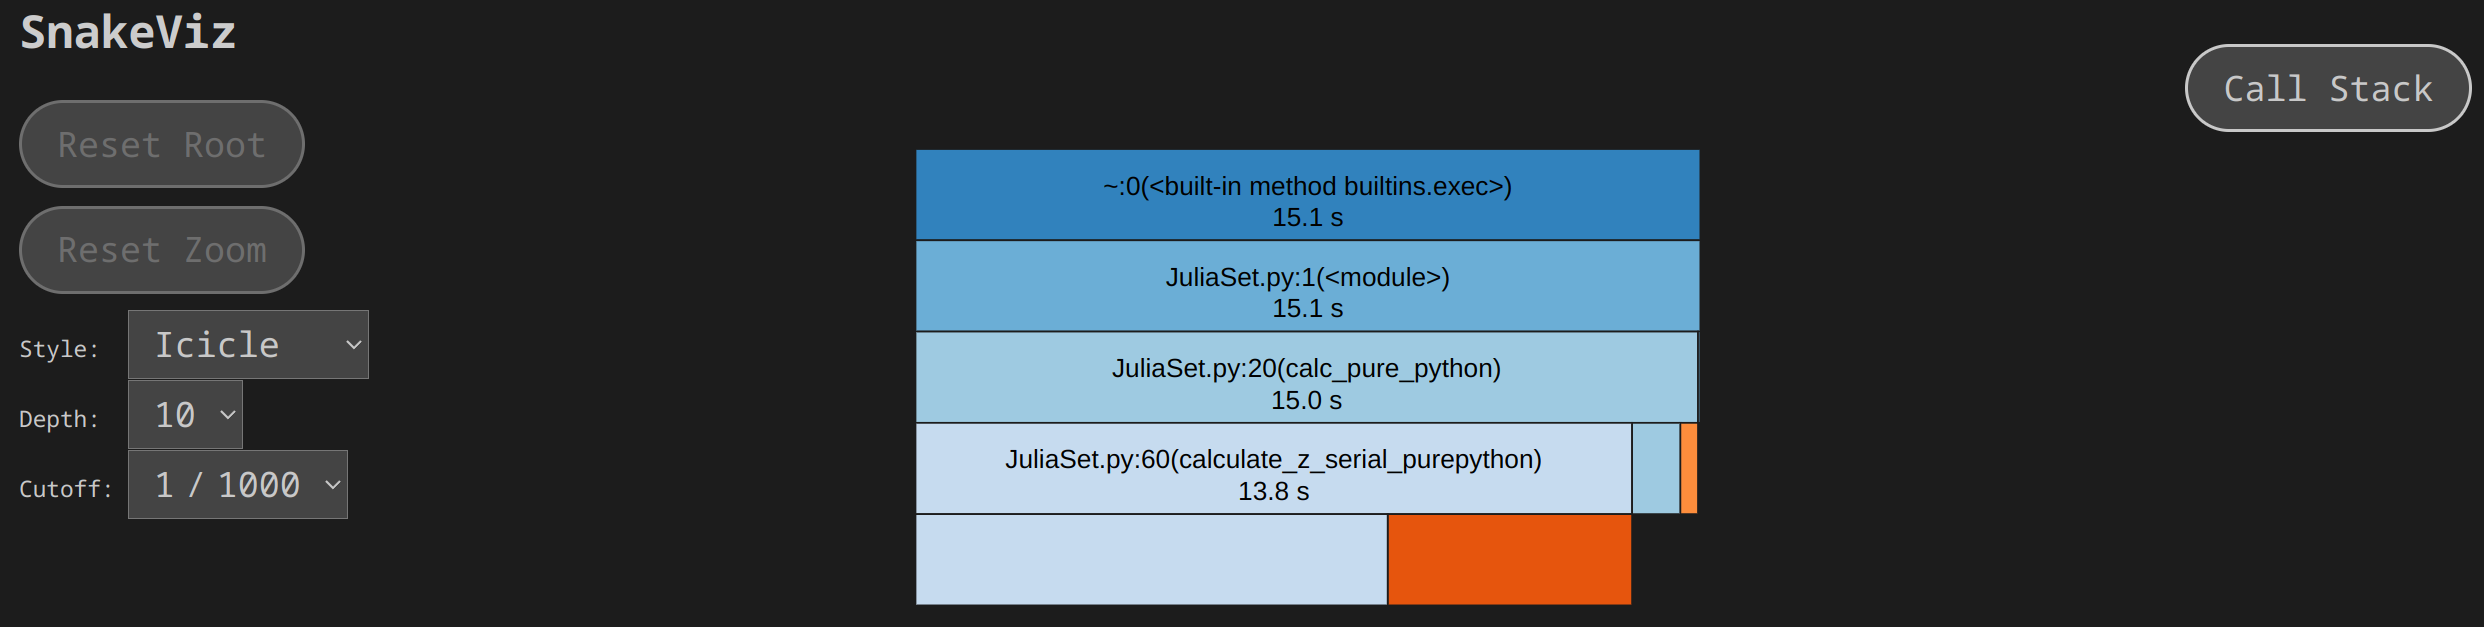
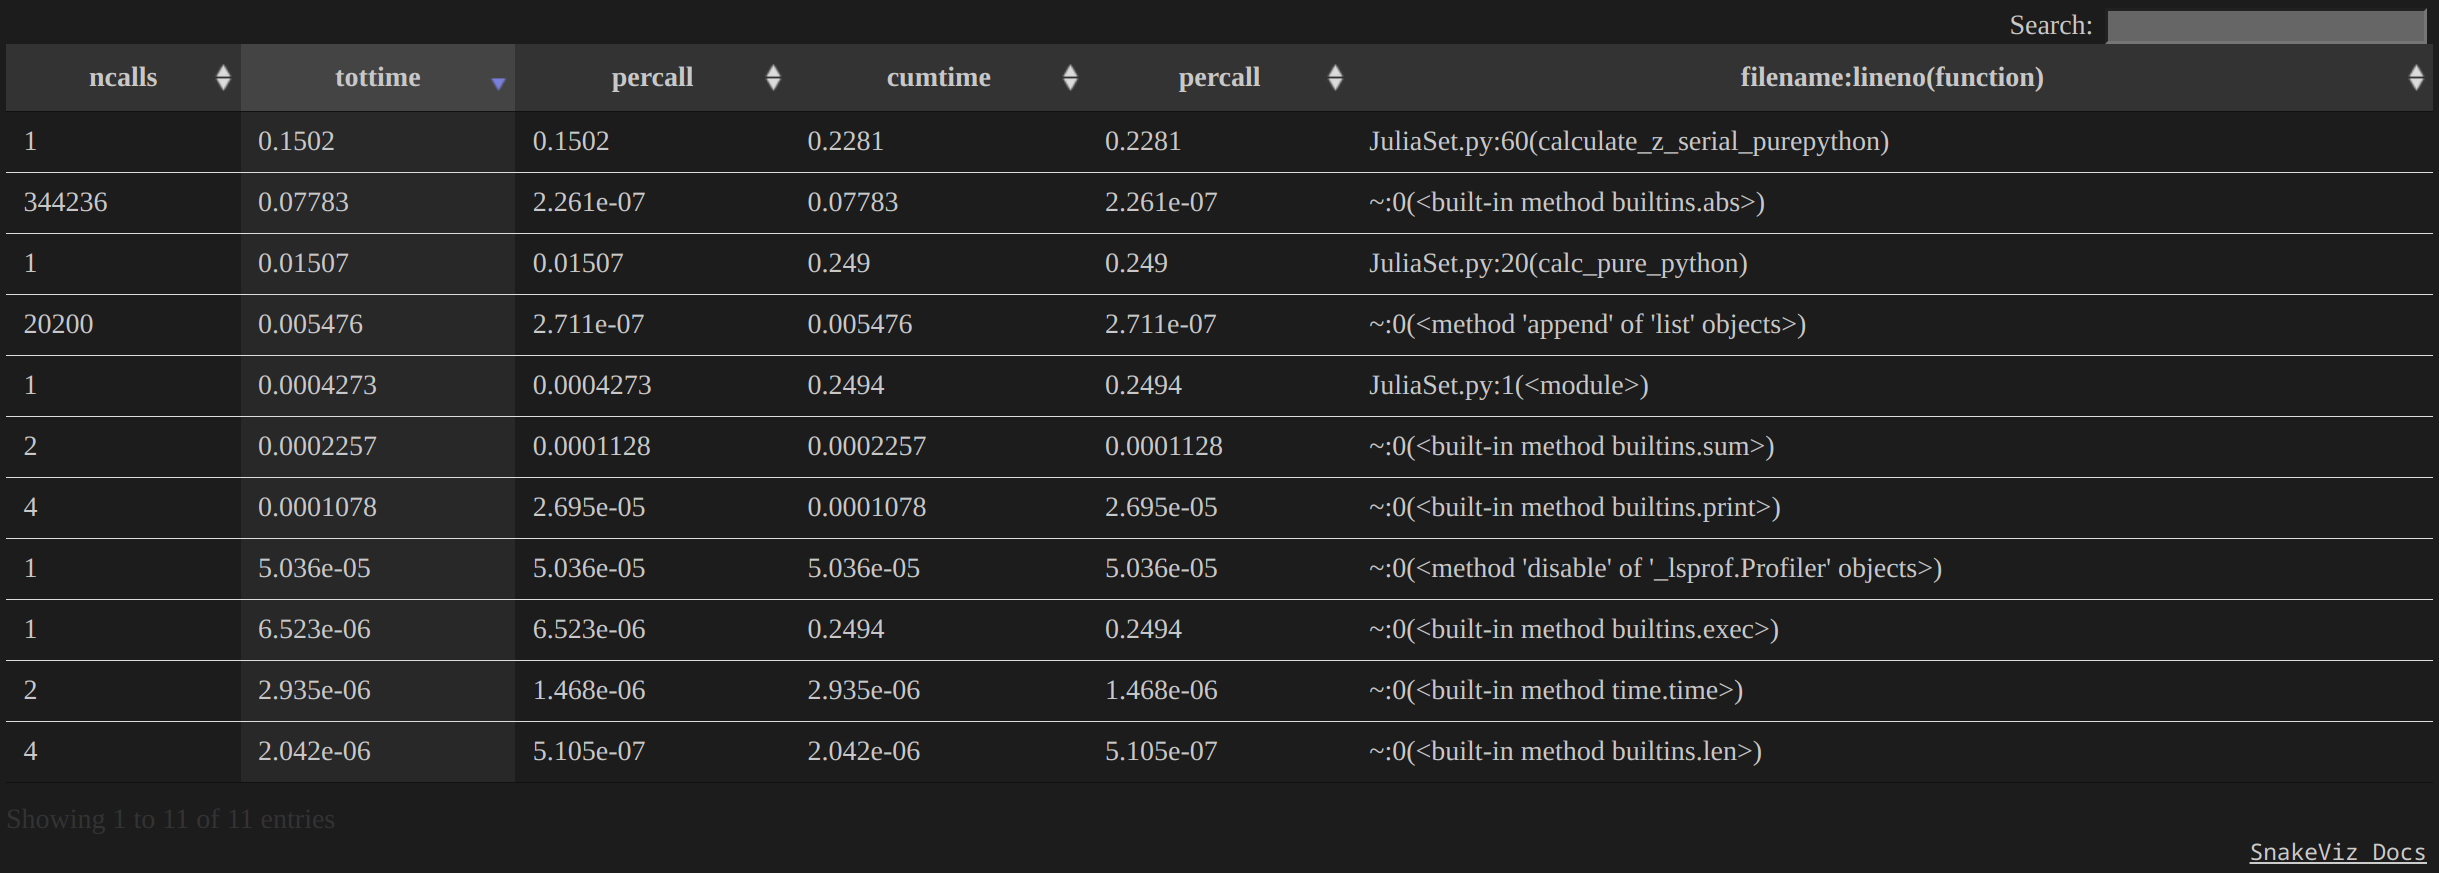

## Result of line_profiler:

In [9]:
## @profile in the line above def calculate_z_serial_purepython(maxiter, zs, cs):
! python -m kernprof -l JuliaSet_profile.py

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 59.81140375137329 seconds
new sum:  33219980
Wrote profile results to JuliaSet_profile.py.lprof
Inspect results with:
python -m line_profiler -rmt "JuliaSet_profile.py.lprof"


In [14]:
! python -m line_profiler -rmt "JuliaSet_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 30.9284 s
File: JuliaSet_profile.py
Function: calculate_z_serial_purepython at line 60

Line #      Hits         Time  Per Hit   % Time  Line Contents
    60                                   @profile                               
    61                                   def calculate_z_serial_purepython(maxi…
    62                                       """Calculate output list using Jul…
    63         1       7778.5   7778.5       output = [0] * len(zs)             
0.0                                          for i in range(len(zs)):           
    64   1000001     289396.0      0.3           n = 0                          
0.9                                              z = zs[i]                      
    65   1000000     235981.3      0.2           c = cs[i]                      
0.8                                              while abs(z) < 2 and n < maxit…
    66   1000000     273711.2      0.3               z = z * z + c              
0.9   

# Task 1.4 Memory-profile the Juliaset code
Report the memory profiling results from memory_profiler and mprof (including the plot)
Measure the overhead of memory_profiler and mprof.
We reduce the problem size to a 100 x 100 grid.

## Results of memory_profiler

In [16]:
# @profile to calculate_z_serial_purepython()
! python -m memory_profiler JuliaSet_profile_small.py

Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 84.17475962638855 seconds
new sum:  334236
Filename: JuliaSet_profile_small.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    60   47.863 MiB   47.863 MiB           1   @profile
    61                                         def calculate_z_serial_purepython(maxiter, zs, cs):
    62                                             """Calculate output list using Julia update rule"""
    63   47.863 MiB    0.000 MiB           1       output = [0] * len(zs)
    64   47.988 MiB    0.000 MiB       10001       for i in range(len(zs)):
    65   47.988 MiB    0.000 MiB       10000           n = 0
    66   47.988 MiB    0.000 MiB       10000           z = zs[i]
    67   47.988 MiB    0.000 MiB       10000           c = cs[i]
    68   47.988 MiB    0.125 MiB      344236           while abs(z) < 2 and n < maxiter:
    69   47.988 MiB    0.000 MiB      334236               z = z * z + c
    70   47.988 MiB    

In [17]:
! python -m mprof run JuliaSet_profile_small.py

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...
Length of x: 100
Total elements: 10000
calculate_z_serial_purepython took 0.1109766960144043 seconds
new sum:  334236


## mprofile Plot

In [13]:
! python -m mprof plot mprofile_20250123131900.dat

Figure(1260x540)


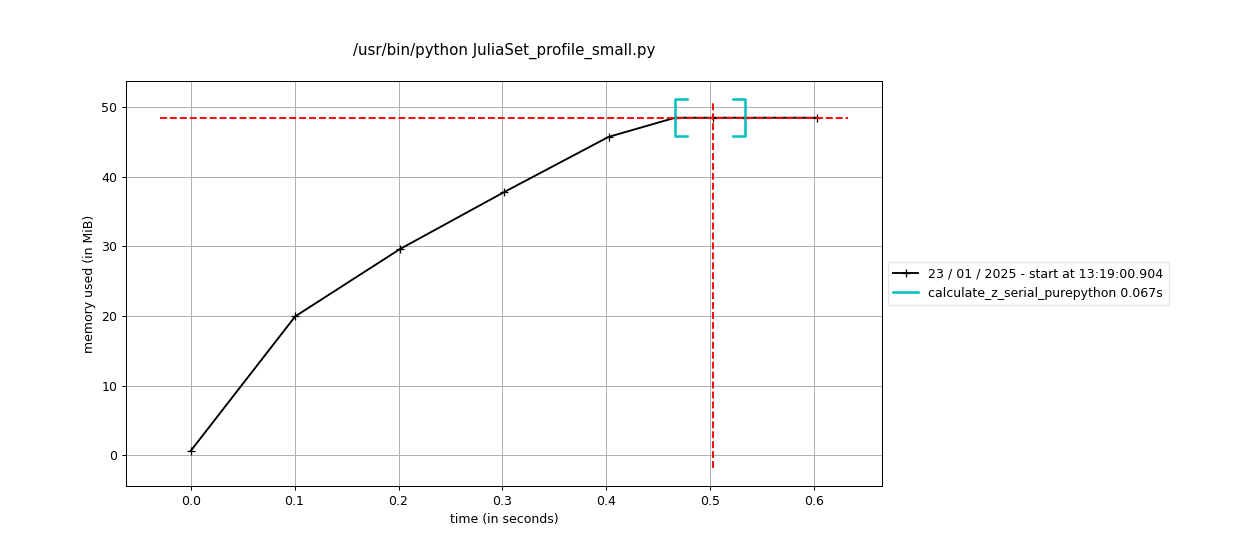

To calculate the overhead, we subtract the time it took to run the JuliaSet functions with and without memory_profiler and mproof. 

Overhead added through memory_profiler: 13.593201875686646s - 0.044191837310791016s = 13.5490100384 s -> extensive overhead added 
Overhead added through mproof: 0.033857107162475586s - 0.04529619216918945s = -0.01143908501s -> no overhead added

From our calculations, we see that there was extensive overhead added with memory_profiler and there was no overhead added with mproof. 

# Exercise 2 

## Task 2.1: Profiling the diffusion code with CProfile and line_profiler

Below are the results from cProfile and line_profiler on the DiffusionProcess code. We also have the visualization from SnakeViz of the cProfile information. 

### cProfile

In [18]:
! python -m cProfile -s cumulative DiffusionProcess.py

         9 function calls in 1.932 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    1.932    1.932 {built-in method builtins.exec}
        1    0.012    0.012    1.932    1.932 DiffusionProcess.py:1(<module>)
        1    0.049    0.049    1.920    1.920 DiffusionProcess.py:19(run_experiment)
        5    1.871    0.374    1.871    0.374 DiffusionProcess.py:4(evolve)
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [19]:
! python -m cProfile -o profile_DiffusionProcess.stats DiffusionProcess.py

### SnakeViz to visualize the profiling information from cProfile

In [16]:
! python -m snakeviz profile_DiffusionProcess.stats --server

snakeviz web server started on 127.0.0.1:8080; enter Ctrl-C to exit
http://127.0.0.1:8080/snakeviz/%2Fhome%2Fchris%2FDocuments%2FKTH_P3%2FHPC%2FModule_1%2FSubmission%2Fprofile_DiffusionProcess.stats
^C

Bye!


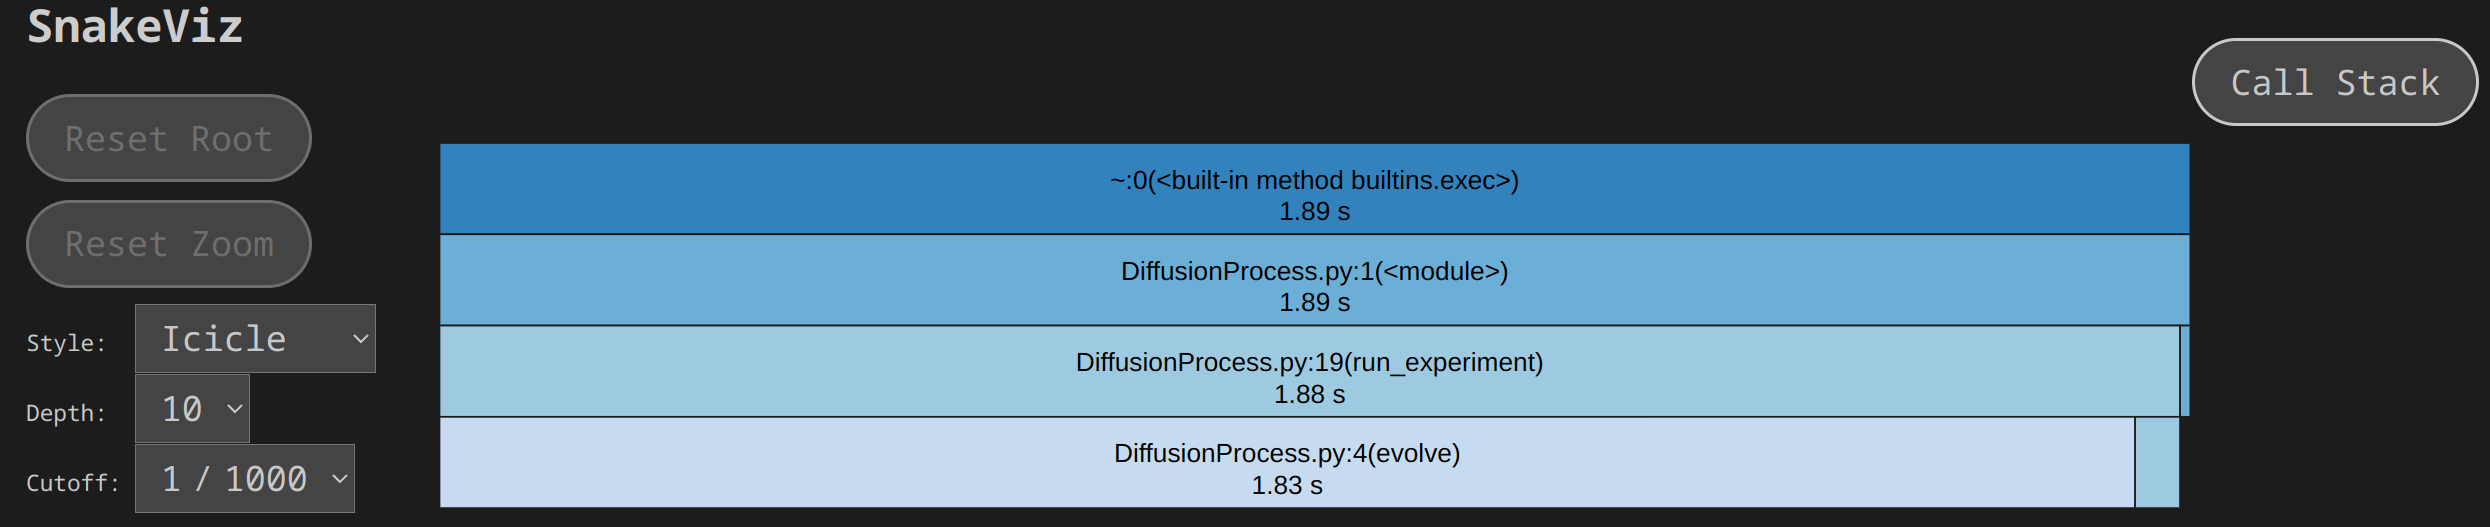
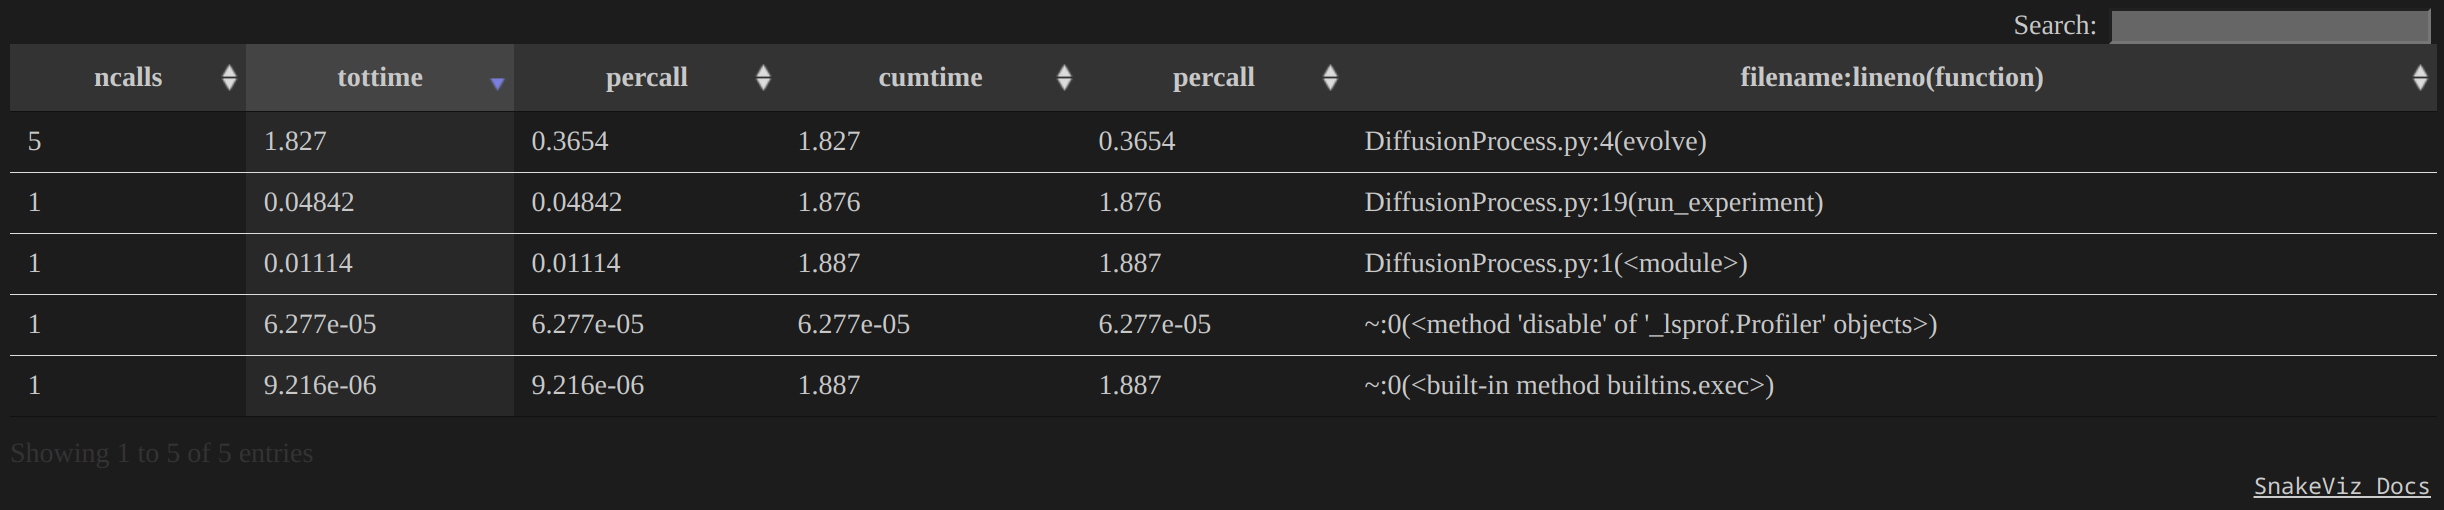

### Result of line_profiler:

In [17]:
# @profile to evolve method
! python -m kernprof -l DiffusionProcess_profile.py

Wrote profile results to DiffusionProcess_profile.py.lprof
Inspect results with:
python -m line_profiler -rmt "DiffusionProcess_profile.py.lprof"


In [18]:
! python -m line_profiler -rmt "DiffusionProcess_profile.py.lprof"

Timer unit: 1e-06 s

Total time: 5.26579 s
File: DiffusionProcess_profile.py
Function: evolve at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                   @profile                               
     4                                   def evolve(grid, dt, D=1.0):           
     5         5         15.8      3.2       xmax, ymax = grid_shape            
0.0                                          new_grid = [[0.0] * ymax for x in …
     6      3205      13220.3      4.1       for i in range(xmax):              
0.3                                              for j in range(ymax):          
     7      3205       1300.0      0.4               grid_xx = (                
0.0                                                      grid[(i + 1) % xmax][j…
     8   2051200     720767.4      0.4               )                          
13.7                                                 grid_yy = (                
     9   2048000     5

## Task 2.2 Memory-profile the diffusion code.

Below are the memory profile results from memory_profiler and mprof plot. 

### memort_profiler Program Output

In [19]:
# @profile to evolve method & make the grid_shape smaller -> (320,320) instead of (640, 640)
! python -m memory_profiler DiffusionProcess_profile_smaller_grid.py

Filename: DiffusionProcess_profile_smaller_grid.py

Line #    Mem usage    Increment  Occurrences   Line Contents
     3   57.129 MiB   49.504 MiB           5   @profile
     4                                         def evolve(grid, dt, D=1.0):
     5   57.129 MiB    0.000 MiB           5       xmax, ymax = grid_shape
     6   57.129 MiB    0.875 MiB        1605       new_grid = [[0.0] * ymax for x in range(xmax)]
     7   57.129 MiB    0.000 MiB        1605       for i in range(xmax):
     8   57.129 MiB    0.000 MiB      513600           for j in range(ymax):
     9   57.129 MiB    6.750 MiB      512000               grid_xx = (
    10   57.129 MiB    0.000 MiB      512000                   grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
    11                                                     )
    12   57.129 MiB    0.000 MiB      512000               grid_yy = (
    13   57.129 MiB    0.000 MiB      512000                   grid[i][(j + 1) % ymax] + grid[i]

In [20]:
! python -m mprof run DiffusionProcess_profile_smaller_grid.py 

mprof.py: Sampling memory every 0.1s
running new process
running as a Python program...


### mprof Plot

In [21]:
! python -m mprof plot mprofile_20250123115503.dat

Figure(1260x540)


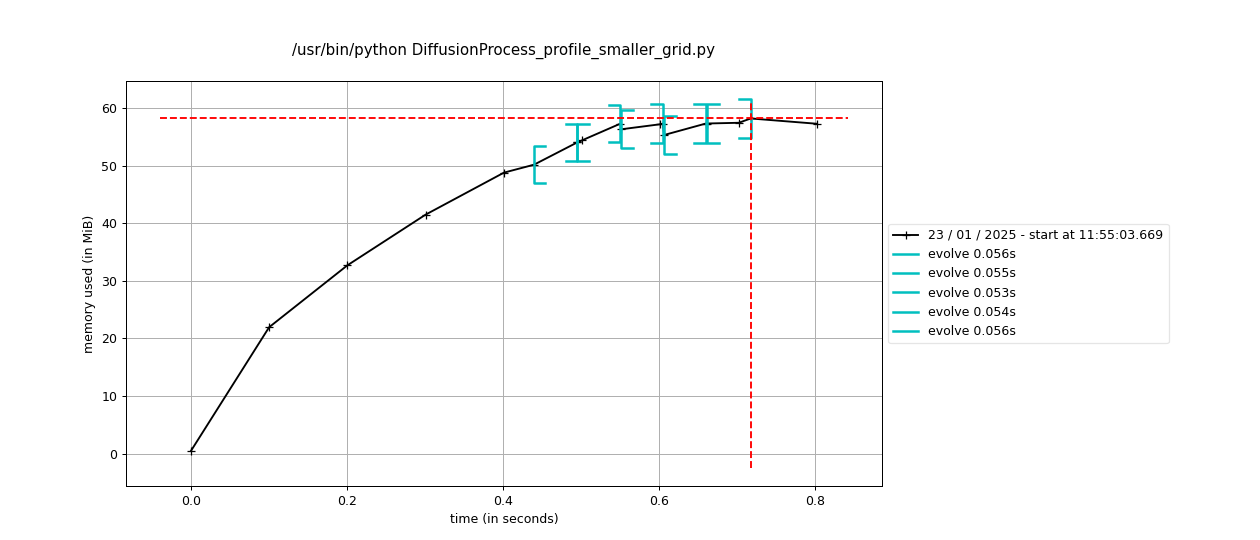

# Bonus Exercise

## Tool Description

Graphical representation of CPU usage percentage per core over time.

Generates a plot and summary table.

Utilized psutil.cpu_percent for measuring percentages and plt.plot for visualization.

## Program Code and Results against Julia Set Code and Diffusion Code

Below is our code to produce a plot that shows the CPU percentage for different cores in our arcitecutres. It was tested on both the Julia Set code and the Diffusion code. We notice that the Julia set code shows CPU usage that is unlike the results from the diffusion code. The usage is linear for all cores which seems unlikely given the varied usage from the diffusion code. 

### Julia Set Code

In [5]:
# area of complex space to investigate
x1, x2, y1, y2 = -1.8, 1.8, -1.8, 1.8
c_real, c_imag = -0.62772, -.42193

def calculate_z_serial_purepython(maxiter, zs, cs):
    """Calculate output list using Julia update rule"""
    output = [0] * len(zs)
    for i in range(len(zs)):
        n = 0
        z = zs[i]
        c = cs[i]
        while abs(z) < 2 and n < maxiter:
            z = z * z + c
            n += 1
        output[i] = n
    return output

@profile
def calc_pure_python(desired_width, max_iterations):
    """Create a list of complex coordinates (zs) and complex parameters (cs),
    build Julia set"""
    x_step = (x2 - x1) / desired_width
    y_step = (y1 - y2) / desired_width
    x = []
    y = []
    ycoord = y2
    while ycoord > y1:
        y.append(ycoord)
        ycoord += y_step
    xcoord = x1
    while xcoord < x2:
        x.append(xcoord)
        xcoord += x_step
    zs = []
    cs = []
    for ycoord in y:
        for xcoord in x:
            zs.append(complex(xcoord, ycoord))
            cs.append(complex(c_real, c_imag))
    print("Length of x:", len(x))
    print("Total elements:", len(zs))
    start_time = time.time()
    output = calculate_z_serial_purepython(max_iterations, zs, cs)
    end_time = time.time()
    secs = end_time - start_time
    print(calculate_z_serial_purepython.__name__ + " took", secs, "seconds")

    # This sum is expected for a 1000^2 grid with 300 iterations
    # It ensures that our code evolves exactly as we'd intended
    print("new sum: ", sum(output))
    # assert sum(output) == 334236
    assert sum(output) == 33219980

### Program Code

In [7]:
import psutil
import time
import matplotlib.pyplot as plt
import pandas as pd
from functools import wraps

# Tool for recording CPU usage
class CPUProfiler:
    def __init__(self):
        self.data = []
        self.start_time = None

    def start(self):
        self.start_time = time.time()

    def record(self):
        if self.start_time is None:
            raise RuntimeError("Profiler has not been started.")
        elapsed_time = time.time() - self.start_time
        cpu_usage = psutil.cpu_percent(interval=1, percpu=True)
        self.data.append((elapsed_time, cpu_usage))

    def save_data(self, filename="cpu_usage.csv"):
        df = pd.DataFrame(self.data, columns=["Time (s)", "CPU Usage"])
        df.to_csv(filename, index=False)

    def plot(self):
        # Create a DataFrame for visualization
        times = [entry[0] for entry in self.data]
        usage = [entry[1] for entry in self.data]

        usage_transposed = list(zip(*usage))
        for core_idx, core_usage in enumerate(usage_transposed):
            plt.plot(times, core_usage, label=f"Core {core_idx}")
        
        plt.xlabel("Time (s)")
        plt.ylabel("CPU Usage (%)")
        plt.title("CPU Usage Per Core")
        plt.legend()
        plt.grid(True)
        plt.show()

    def summary_table(self):
        usage = [entry[1] for entry in self.data]
        avg_usage = [sum(core) / len(usage) for core in zip(*usage)]
        summary = pd.DataFrame({
            "Core": [f"Core {i}" for i in range(len(avg_usage))],
            "Average CPU Usage (%)": avg_usage
        })
        return summary

# Decorator to profile a function
def profile(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        profiler.record()  # Record before function call
        result = func(*args, **kwargs)
        profiler.record()  # Record after function call
        return result
    return wrapper

# Initialize profiler
profiler = CPUProfiler()

# Function implementations
grid_shape = (320, 320)

@profile
def evolve(grid, dt, D=1.0):
    xmax, ymax = grid_shape
    new_grid = [[0.0] * ymax for x in range(xmax)]
    for i in range(xmax):
        for j in range(ymax):
            grid_xx = (
                grid[(i + 1) % xmax][j] + grid[(i - 1) % xmax][j] - 2.0 * grid[i][j]
            )
            grid_yy = (
                grid[i][(j + 1) % ymax] + grid[i][(j - 1) % ymax] - 2.0 * grid[i][j]
            )
            new_grid[i][j] = grid[i][j] + D * (grid_xx + grid_yy) * dt
    return new_grid

def run_experiment(num_iterations):
    # Setting up initial conditions 
    xmax, ymax = grid_shape
    grid = [[0.0] * ymax for x in range(xmax)]

    # Simulating a drop of dye in the middle of our simulated region
    block_low = int(grid_shape[0] * 0.4)
    block_high = int(grid_shape[0] * 0.5)
    for i in range(block_low, block_high):
        for j in range(block_low, block_high):
            grid[i][j] = 0.005

    # Evolve the initial conditions
    for i in range(num_iterations):
        grid = evolve(grid, 0.1)

### Program Results (11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz   2.30 GHz) for JuliaSet code

Length of x: 1000
Total elements: 1000000
calculate_z_serial_purepython took 4.753264665603638 seconds
new sum:  33219980


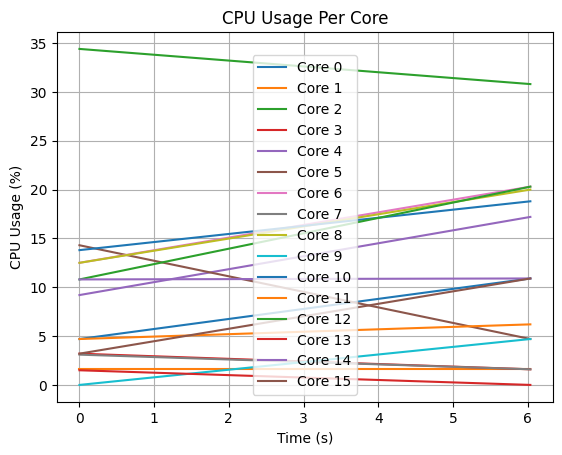

       Core  Average CPU Usage (%)
0    Core 0                   7.80
1    Core 1                   1.60
2    Core 2                  32.60
3    Core 3                   2.40
4    Core 4                  13.20
5    Core 5                   9.50
6    Core 6                  16.40
7    Core 7                   2.35
8    Core 8                  16.25
9    Core 9                   2.35
10  Core 10                  16.30
11  Core 11                   5.45
12  Core 12                  15.55
13  Core 13                   0.75
14  Core 14                  10.85
15  Core 15                   7.05


In [8]:
profiler.start()
# run_experiment(5)
calc_pure_python(desired_width=1000, max_iterations=300)
profiler.plot()
summary = profiler.summary_table()
print(summary)
profiler.save_data()

## Comparison of Results across Architectures against Diffusion Set code

Across the 4 machines we tested on, there was very little in common in our CPU usage results. Some machines had a more structured, predictable core usage scheme, while some were incredibly unpredictable. Most of the machines had at least some peaks in usage that seemed to be shared by most or all of the cores, though the size of the peaks and the level of correlation between cores varies. 

### Apple Silicon M1 Chip 8 Core
Somewhat erratic plot over time with two distinct peaks. Overall, Core 0 had the highest average usage with decreasing usage for each subsequent core.

![WhatsApp Image 2025-01-23 at 14.05.42_c6aae508.jpg](<attachment:WhatsApp Image 2025-01-23 at 14.05.42_c6aae508.jpg>)

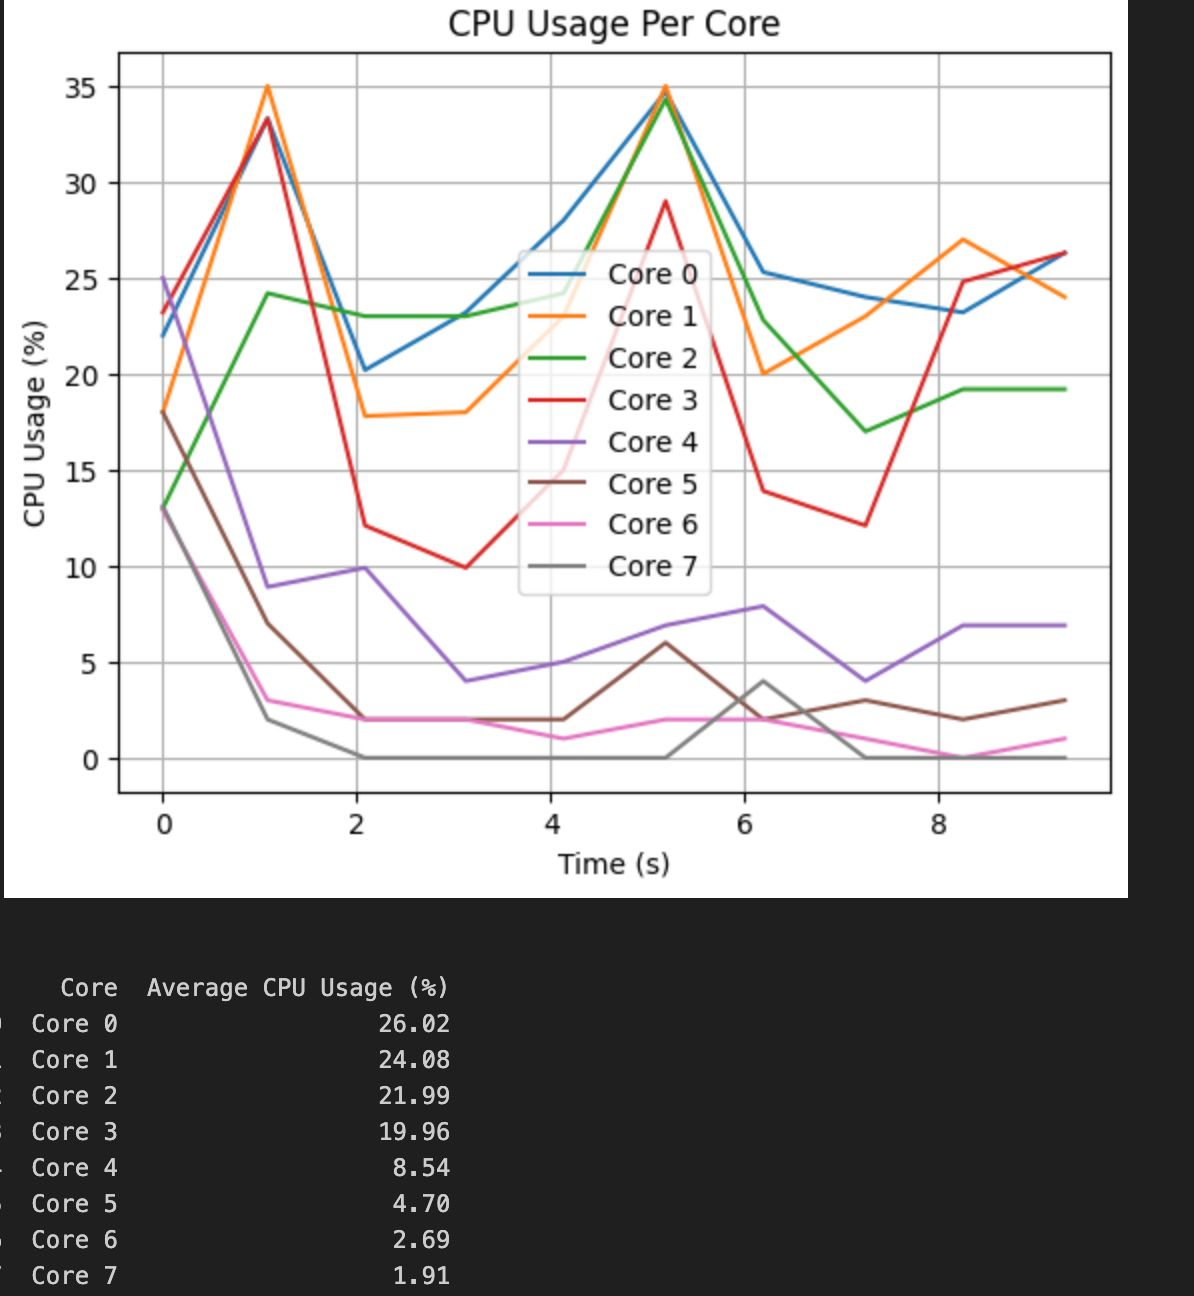

### AMD Ryzen 5 5600U with Radeon Graphics @ 12x 2.301GHz
Each core seems to follow a similar usage pattern over time, with a distinct shared large peak and a few smaller peaks over time. Overall, the average CPU usage does not seem to follow a pattern by core number.

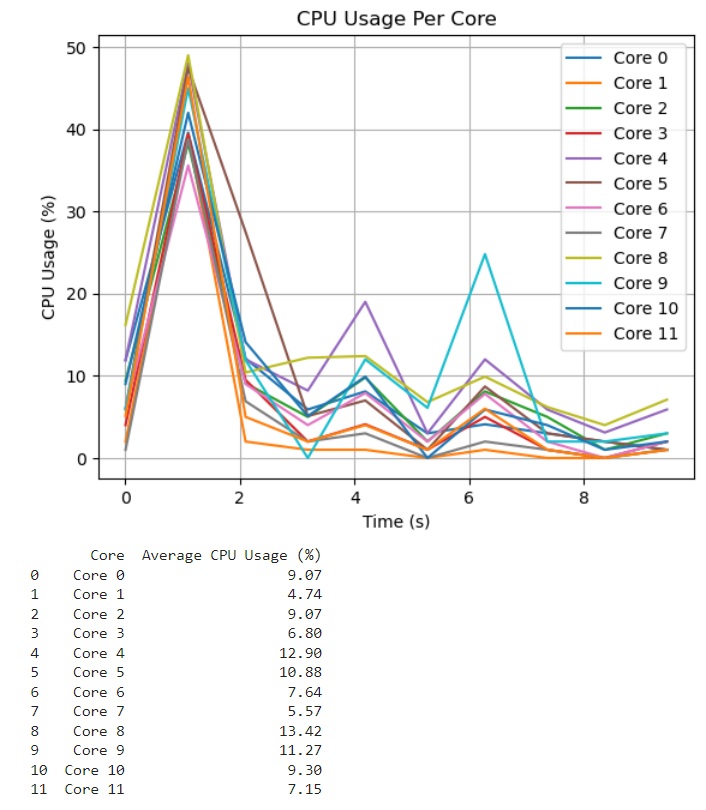

### 11th Gen Intel(R) Core(TM) i7-11800H @ 2.30GHz   2.30 GHz
Extremely random usage, with no distinct peaks or patterns that all cores follow. Average usage by core is very unpredictable.

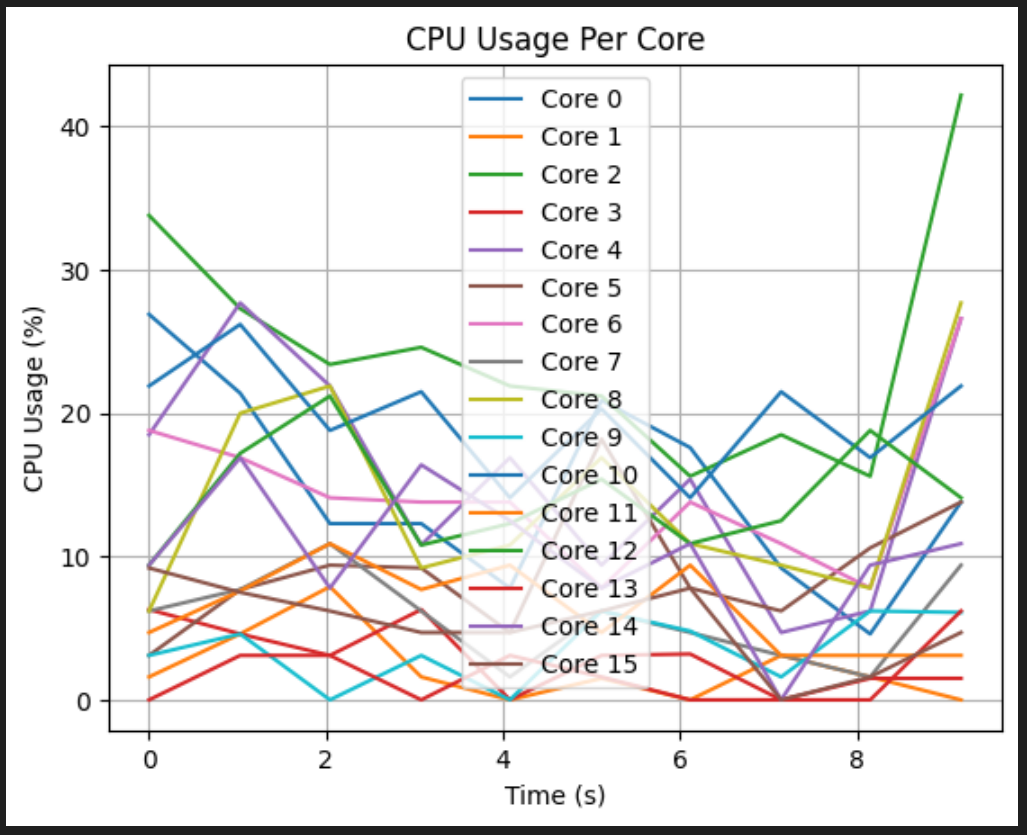
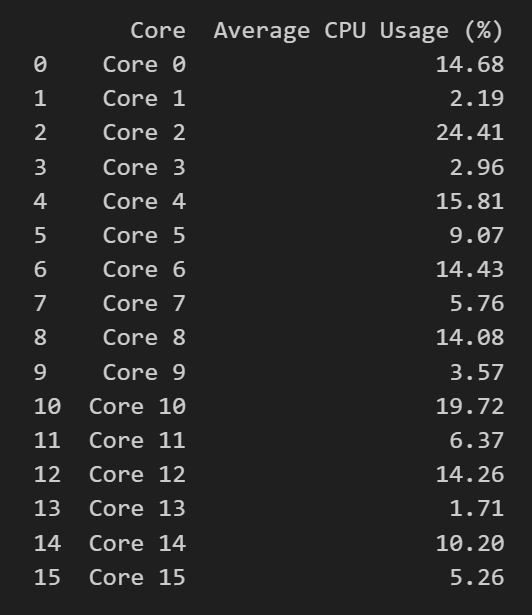

### Intel(R) Core(TM) Ultra 7 155H[Cores 16] [Logical processors 22]
Extremely unbalanced core use, with core 6 doing the vast majority of the work. Some small common peaks for the other cores, though several of the cores were not used at all.

![WhatsApp Image 2025-01-23 at 14.06.34_9d915555.jpg](<attachment:WhatsApp Image 2025-01-23 at 14.06.34_9d915555.jpg>)
![WhatsApp Image 2025-01-23 at 14.07.16_308ce4e7.jpg](<attachment:WhatsApp Image 2025-01-23 at 14.07.16_308ce4e7.jpg>)
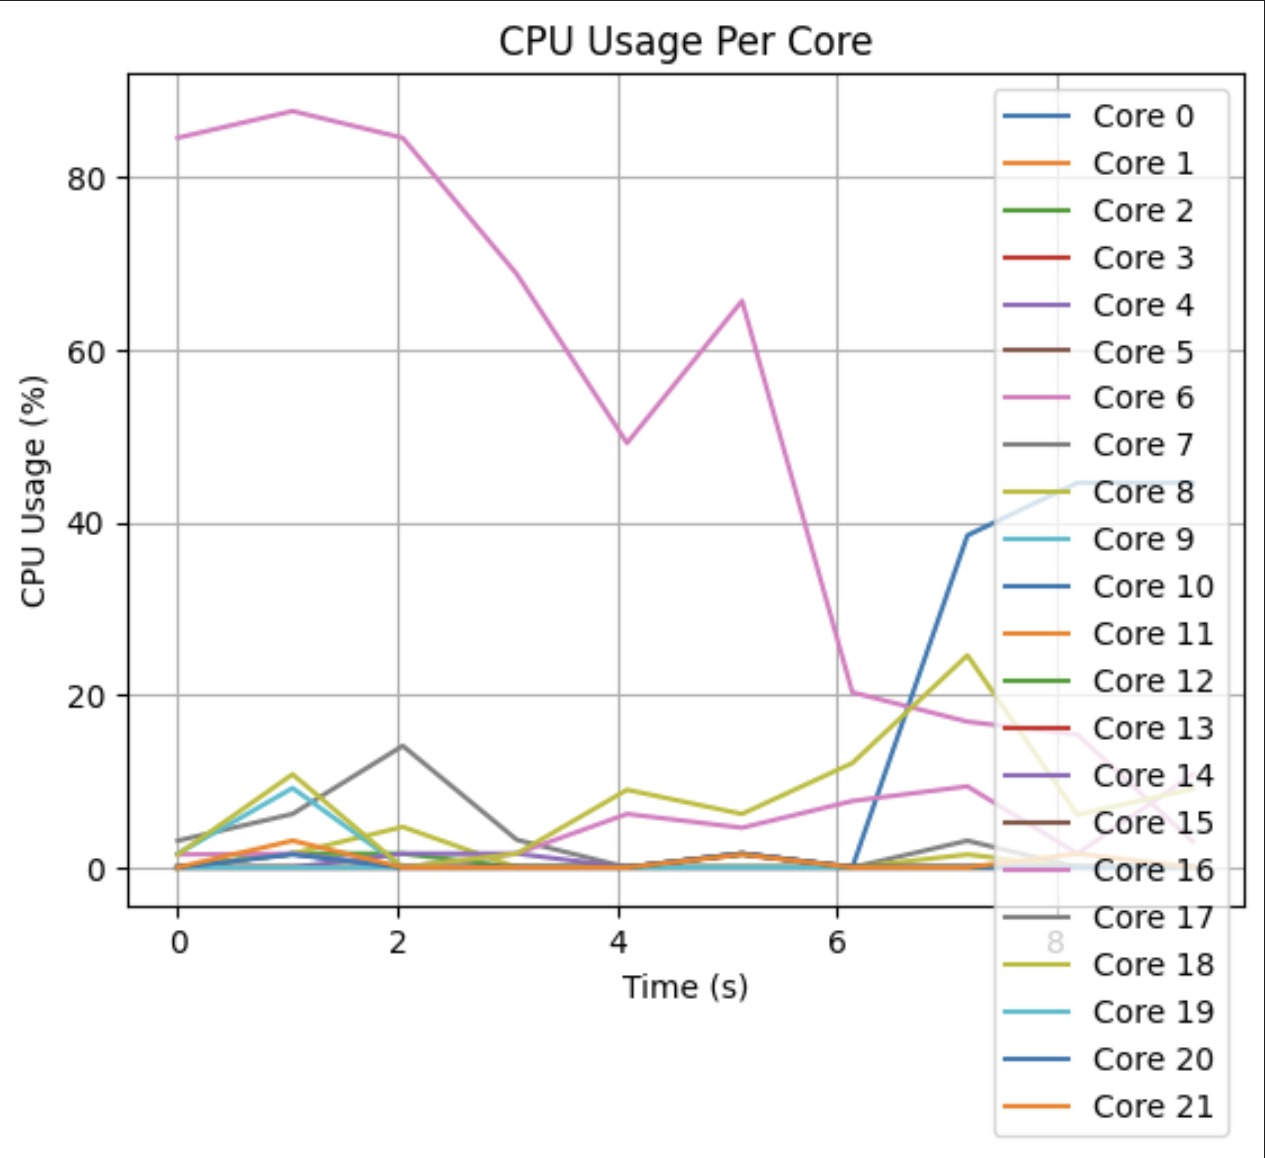
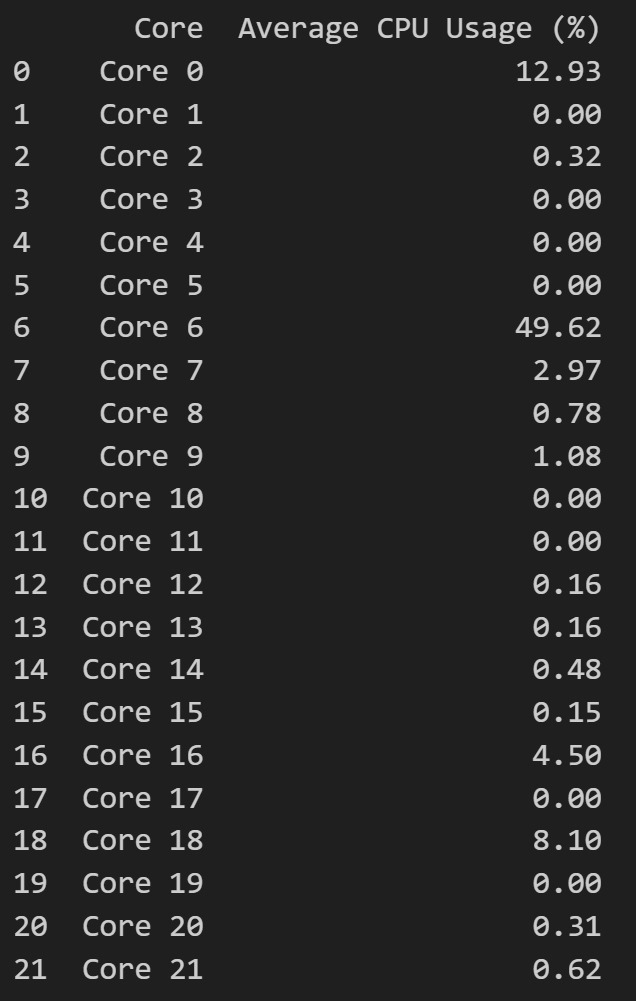

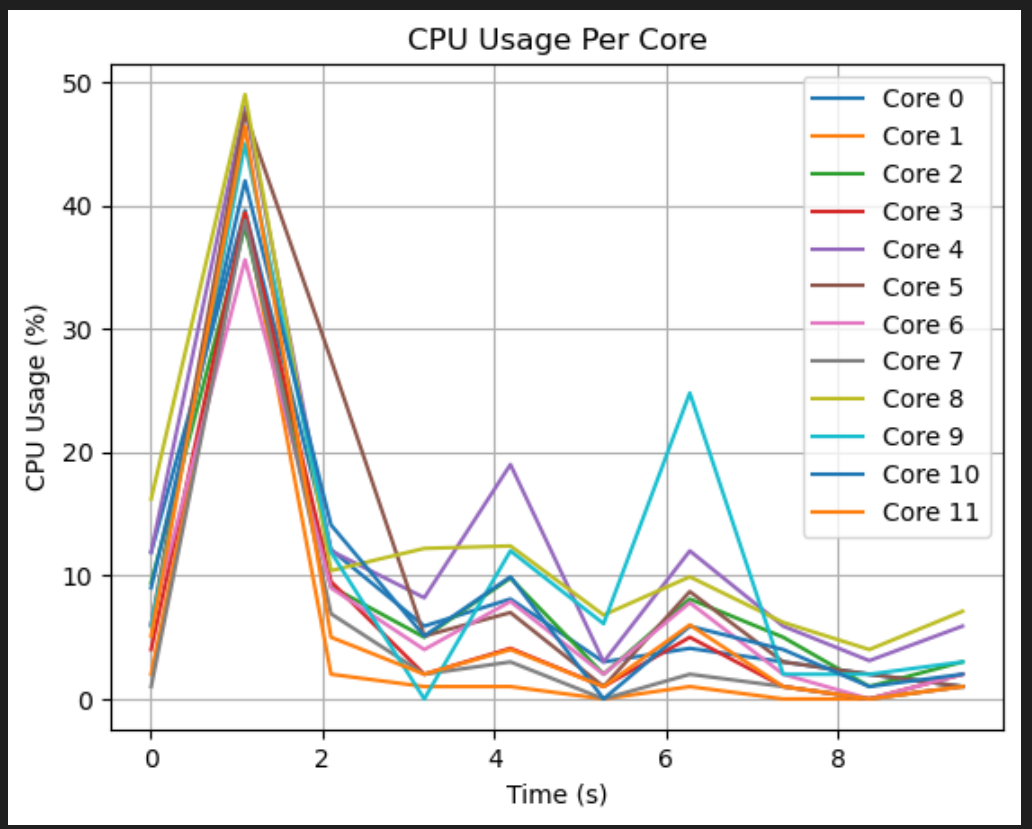
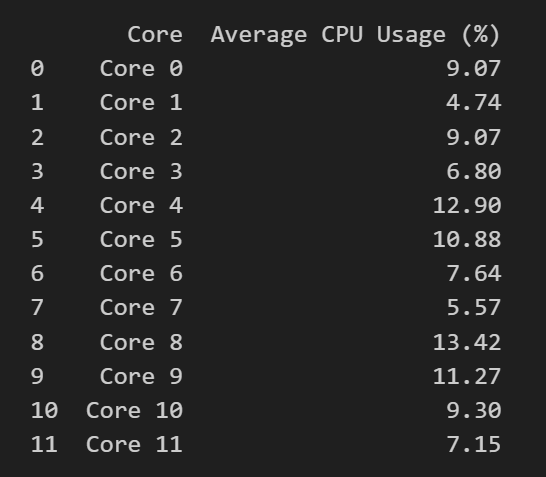